# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Write your question here.* <br>
***What is the average point difference in a NBA game? Once calculated, what is the probability that a team wins by more than 7 points?***

## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?*
- *What population will you be studying?*
- *What variables will you focus on in your study?*
- *How do you plan on collecting data?*
    - *What sampling technique will you use?*
    - *How will you ensure your data collection is random?*
- *What is one source of bias that may impact the results of your study?*

***I will be performing a retrospective observational study using a census of all NBA games from the ESPN API endpoint https://cdn.nba.com/static/json/staticData/scheduleLeagueV2.json. The variable this study focuses on is the score difference of each game.***

## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [1]:
import requests
import random

URL = "https://cdn.nba.com/static/json/staticData/scheduleLeagueV2.json"

data = requests.get(URL, timeout=10).json()

games = []

# Loop through all days in the schedule
for date_block in data["leagueSchedule"]["gameDates"]:
    for g in date_block["games"]:
        if g.get("gameStatus") != 3:  # 3 = Final
            continue
        
        games.append({
            "team1": g["homeTeam"]["teamName"],
            "team2": g["awayTeam"]["teamName"],
            "score1": g["homeTeam"]["score"],
            "score2": g["awayTeam"]["score"],
            "difference": abs(g["homeTeam"]["score"] - g["awayTeam"]["score"]),
        })

# Randomly select 100 games
random.shuffle(games)
sampled = games[:100]

print(f"Total games found: {len(games)}")
print("\nSample of 10 games:\n")
for g in sampled[:10]:
    print(f"{g['team1']} vs {g['team2']} — {g['score1']}-{g['score2']} (diff={g['difference']})")


Total games found: 436

Sample of 10 games:

Spurs vs Loong-Lions — 119-88 (diff=31)
Wizards vs Bucks — 129-126 (diff=3)
Bucks vs Rockets — 115-122 (diff=7)
Pistons vs Jazz — 114-103 (diff=11)
Pistons vs Cavaliers — 95-116 (diff=21)
Knicks vs Nets — 134-98 (diff=36)
Suns vs Rockets — 92-114 (diff=22)
Pistons vs Hawks — 99-98 (diff=1)
Hornets vs Raptors — 118-111 (diff=7)
Jazz vs Clippers — 129-108 (diff=21)


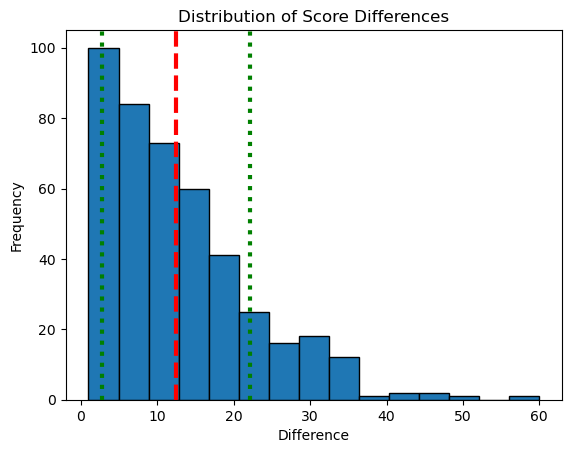

In [2]:
# Call info() here
import matplotlib.pyplot as plt
import statistics as stat

scoreDiff = [g['difference'] for g in games]
mean = stat.mean(scoreDiff)
std = stat.stdev(scoreDiff)
stdUpper = mean+std
stdLower = mean-std

plt.axvline(mean, color='red', linestyle='--', linewidth=3, label='Mean')
plt.axvline(stdUpper, color='green', linestyle=':', linewidth=3, label='Mean')
plt.axvline(stdLower, color='green', linestyle=':', linewidth=3, label='Mean')
plt.hist(scoreDiff, bins=15, edgecolor='black')
plt.title('Distribution of Score Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.show()


## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

In [4]:
# Perform your analysis here
print("The mean score difference in a NBA game is: ", mean)
print("The standard deviation is: ", std)

def z_score_to_percentile(z_score):
  """
  Calculates the percentile corresponding to a given Z-score.

  Args:
    z_score: The Z-score for which to calculate the percentile.

  Returns:
    The percentile (as a percentage, from 0 to 100).
  """
  # The cdf() method returns the cumulative probability for a given value,
  # which is equivalent to the percentile in decimal form.
  percentile_decimal = norm.cdf(z_score)
  percentile_percentage = percentile_decimal * 100
  return percentile_percentage

from scipy.stats import norm
z_score = (7-mean)/std
print("Z-Score: ", z_score)
percentile = z_score_to_percentile(z_score)
print(percentile, "%")

The mean score difference in a NBA game is:  12.44954128440367
The standard deviation is:  9.700561650792206
Z-Score:  -0.5617758518094288
28.713437343738168 %


## 🧠 My Answer

*Write your answer here.* <br>

*Remember to interpret the specific values that you found in your analysis. It may help to pretend like I have never heard of the population you are studying and have no idea how to interpret the analysis you performed.*

***In conclusion, the distribution of score differences in an NBA game is heavily skewed right, with an average score difference of 12.3139 points and a standard deviation of 9.7 points. If the score difference is 7 points, that game would be in the 28.713rd percentile with a z-score of -.56177.***